In [ ]:
# https://stackoverflow.com/questions/63684459/should-i-use-evaluate-generator-or-evaluate-to-evaluate-my-cnn-model
import numpy as np
import tensorflow as tf
import urllib
import zipfile
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, MaxPooling2D

local_zip = '/content/data_pet_classification.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('content/pet_classification/')
zip_ref.close()
#
IMAGE_SHAPE=300
img_train_folder='content/pet_classification/data/train/'
img_test_folder='content/pet_classification/data/test/'
#
train_datagen = ImageDataGenerator(rescale=1/255)

validation_datagen = ImageDataGenerator(rescale=1/255)


train_generator = train_datagen.flow_from_directory(
                                      img_train_folder,  
                                      target_size=(300, 300),  
                                      batch_size=4,
                                      class_mode='binary')


validation_generator = validation_datagen.flow_from_directory(
                                      img_test_folder,  
                                      target_size=(300, 300), 
                                      batch_size=4,
                                      class_mode='binary')

inputShape=(IMAGE_SHAPE, IMAGE_SHAPE, 3)
fc_size=32

#----------------------------
#--- Generate le CNN model
#----------------------------
def get_model():
  l_model=Sequential()
  l_model.add(Input(inputShape))
  l_model.add(Conv2D(32, kernel_size=(5,5),activation='relu'))
  l_model.add(MaxPooling2D(pool_size=(2,2)))
  l_model.add(Conv2D(64, kernel_size=(5,5),activation='relu'))
  l_model.add(MaxPooling2D(pool_size=(2,2)))
  l_model.add(Dense(fc_size,activation='relu'))
  l_model.add(Flatten())
  l_model.add(Dropout(0.4))
  l_model.add(Dense(2,activation='softmax'))

  #l_model.summary()
  
  return l_model

#----------------------------
#--- For traning model
#----------------------------
def fit_model(i_model,i_num_epoch,i_lr,i_verbose=0):
  l_model=i_model
  l_model.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.RMSprop(learning_rate=i_lr),
                metrics=['accuracy'])
  
  l_history= l_model.fit(
                    train_generator,
                    epochs=i_num_epoch,
                    verbose=i_verbose
                    )
  return l_model, l_history

#----------------------------
#--- For loss and accuracy evaluating
#----------------------------
def eval(i_model,i_validation_generator):
  l_scores = i_model.evaluate(i_validation_generator,verbose=0)
  print('loss=',np.round(l_scores[0]*100,2),'%')
  print('accuracy=',np.round(l_scores[1]*100,2),'%')

#----------------------------
#--- To plot loss and accuracy vs epochs
#----------------------------
def plot_loss_acc(i_history):

  acc = i_history.history['accuracy']
  loss = i_history.history['loss']

  epochs = range(len(acc))
  
  plt.style.use('seaborn-whitegrid')
  #plt.figure(figsize=(6, 4))
  plt.plot(epochs, acc, label='Training accuracy')
  plt.title('Training accuracy')
  plt.legend()
  #
  plt.figure()
  #plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, loss, label='Training Loss')
  plt.title('Training loss')
  plt.legend()


Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


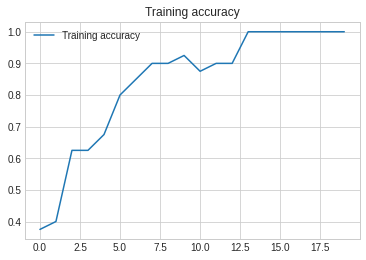

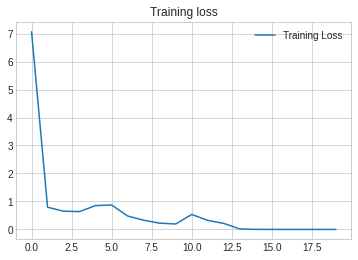

In [ ]:
#-----------
epochs=20
#-----------
#
model_20,history_20=fit_model(get_model(),epochs,0.001)

plot_loss_acc(history_20)

In [ ]:
#-------------------
# model_20: Evaluate on Validation data
#-------------------
print('loss and accuracy on the Evaluation Data:')
print('--------')
eval(model_20,validation_generator)
print('--------')


loss and accuracy on the Evaluation Data:
--------
loss= 297.2 %
accuracy= 50.0 %
--------


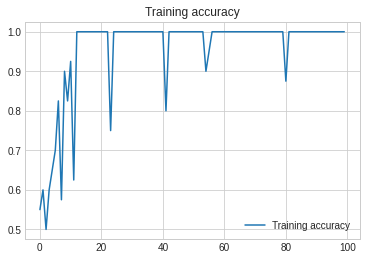

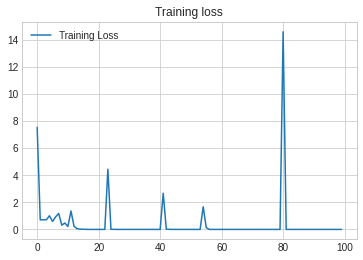

In [ ]:
#-----------
epochs=100
#-----------
#
model_100,history_100=fit_model(get_model(),epochs,0.001)

plot_loss_acc(history_100)

In [ ]:
#-------------------
# model_100: Evaluate on Validation data
#-------------------
print('loss and accuracy on the Evaluation Data:')
print('--------')
eval(model_100,validation_generator)
print('--------')

loss and accuracy on the Evaluation Data:
--------
loss= 576.29 %
accuracy= 60.0 %
--------


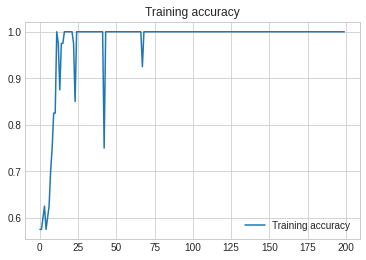

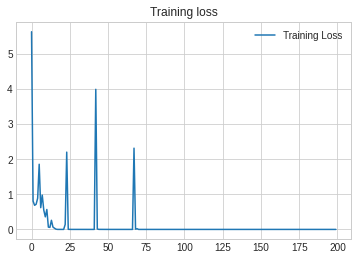

In [ ]:
#-----------
epochs=200
#-----------
#
model_200,history_200=fit_model(get_model(),epochs,0.001)

plot_loss_acc(history_200)

In [ ]:
#-------------------
# model_200: Evaluate on Validation data
#-------------------
print('loss and accuracy on the Evaluation Data:')
print('--------')
eval(model_200,validation_generator)
print('--------')

loss and accuracy on the Evaluation Data:
--------
loss= 1258.25 %
accuracy= 50.0 %
--------


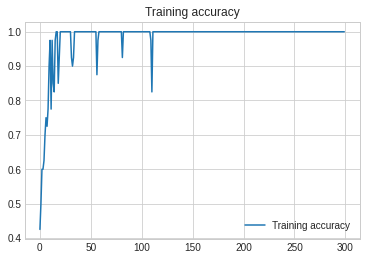

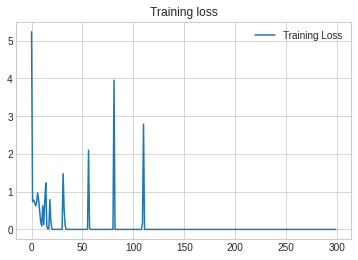

In [ ]:
#-----------
epochs=300
#-----------
#
model_300,history_300=fit_model(get_model(),epochs,0.001)

plot_loss_acc(history_300)

In [ ]:
#-------------------
# model_300: Evaluate on Validation data
#-------------------
print('loss and accuracy on the Evaluation Data:')
print('--------')
eval(model_300,validation_generator)
print('--------')

loss and accuracy on the Evaluation Data:
--------
loss= 1699.82 %
accuracy= 55.0 %
--------


# BONUS

In [ ]:
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.metrics import confusion_matrix, classification_report
#
folder_dogs="dogs/"
folder_cats="cats/"
TFOLDER_PATH = "/content/content/pet_classification/data/test/"
#TFOLDER_PATH = "/content/content/pet_classification/data/train/"
IMAGE_SHAPE=300
#
tfolder_list_pet=[]
tfolder_list_pet_id=[]
tfolder_list_pet_id_pred=[]
#

#
tfolder_dogs_images = os.listdir(TFOLDER_PATH + os.sep+ folder_dogs)
tfolder_cats_images = os.listdir(TFOLDER_PATH + os.sep+ folder_cats)
# 
for i in range(len(tfolder_dogs_images)):
  #tfolder_list_pet.append(tfolder_dogs_images[i])
  tfolder_list_pet_id.append(0)  # dog --> 0
for i in range(len(tfolder_cats_images)):
  #tfolder_list_pet.append(tfolder_cats_images[i])
  tfolder_list_pet_id.append(1)  # cat --> 1
#

def get_prediction_list(i_model,i_folder,i_len,i_IMAGE_SHAPE=300):
  #
  l_tfolder_list_pet_id_pred=[]
  #
  for i in range(0,i_len):
    tfolder_pet_img = tfolder_dogs_images[i]
    tfolder_pet_img = cv2.imread(TFOLDER_PATH + os.sep+ i_folder + tfolder_pet_img)

    #plt.figure()
    #plt.imshow(tfolder_pet_img)

    tfolder_pet_img = cv2.resize(tfolder_pet_img / 255, (i_IMAGE_SHAPE, i_IMAGE_SHAPE))
    tfolder_pet_img = tfolder_pet_img.reshape(1, i_IMAGE_SHAPE, i_IMAGE_SHAPE, 3)

    prediction = i_model.predict(tfolder_pet_img)

    if prediction[0][0] <= 0.50:
        l_tfolder_list_pet_id_pred.append(1)
    else:
        l_tfolder_list_pet_id_pred.append(0)
  return l_tfolder_list_pet_id_pred

#
def print_report(i_model):
  ll_pred_dogs=get_prediction_list(i_model,"dogs/",len(tfolder_dogs_images))
  ll_pred_cats=get_prediction_list(i_model,"cats/",len(tfolder_cats_images))
  #
  tfolder_list_pet_id_pred= ll_pred_dogs + ll_pred_cats
  #
  print('tfolder_list_pet_id--->')
  print('tfolder_list_pet_id_pred--->')
  print(tfolder_list_pet_id)
  print(tfolder_list_pet_id_pred)
  #
  print(confusion_matrix(tfolder_list_pet_id, tfolder_list_pet_id_pred))
  c_report= classification_report(tfolder_list_pet_id, tfolder_list_pet_id_pred)
  print(c_report)


In [ ]:
# Evaluate on Validation data
eval(model_20,validation_generator)
print()
print_report(model_20)

loss= 229.28 %
accuracy= 55.0 %

tfolder_list_pet_id--->
tfolder_list_pet_id_pred--->
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[[4 6]
 [1 9]]
              precision    recall  f1-score   support

           0       0.80      0.40      0.53        10
           1       0.60      0.90      0.72        10

    accuracy                           0.65        20
   macro avg       0.70      0.65      0.63        20
weighted avg       0.70      0.65      0.63        20



[[0.07658239 0.92341757]]
Prediction--> pet_chien01.jpg   It's a CAT ... 

[[0.81738275 0.18261719]]
Prediction--> petchien02.jpg   It's a DOG ==== 

[[0.45449582 0.5455042 ]]
Prediction--> chat_01.jpg   It's a CAT ... 



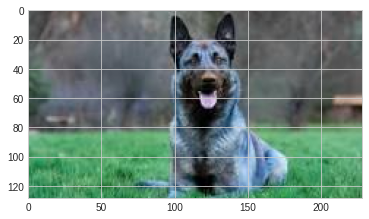

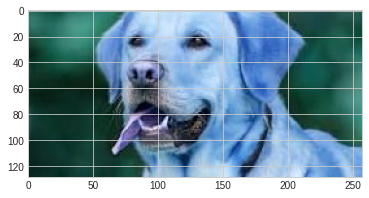

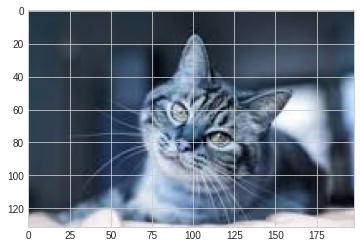

In [ ]:
import matplotlib.pyplot as plt
import os
import cv2
#
#-------------------------
model=model_20
#--------------------------

IMAGE_SHAPE=300
#-------------------
TEST_PATH = "/content/content/pet_classification/data/test/"
TEST_PATH = "/content/tmp/"
folder_pets="dogs/"
folder_pets="dogs/"
folder_pets="petss/"
#-----------------------
test_pets_images = os.listdir(TEST_PATH + os.sep+ folder_pets)

for i in range(0,len(test_pets_images)):
  n_image=test_pets_images[i]
  test_pet_img = test_pets_images[i]
  test_pet_img = cv2.imread(TEST_PATH + os.sep+ folder_pets + test_pet_img)

  plt.figure()
  plt.imshow(test_pet_img)

  test_pet_img = cv2.resize(test_pet_img / 255, (IMAGE_SHAPE, IMAGE_SHAPE))
  test_pet_img = test_pet_img.reshape(1, IMAGE_SHAPE, IMAGE_SHAPE, 3)

  prediction = model.predict(test_pet_img)

  print(prediction)

  if prediction[0][0] <= 0.5:
      print("Prediction-->", n_image,"  It's a CAT ...",'\n')
  else:
      print("Prediction-->", n_image,"  It's a DOG ====",'\n')

In [ ]:
print(len(test_pets_images))

2
